## THE SPARKS FOUNDATION
## Author : Mohnish Pamnani
### Task 2 : Color Identification in Images

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img_path = r'umbrella.jpg'
img = cv2.imread(img_path)

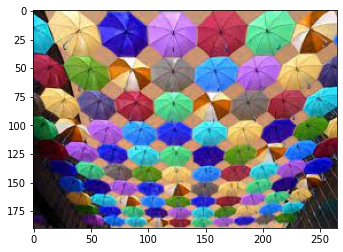

In [3]:
#Printing Image
plt.imshow(img)

In [4]:
#Declaring Global Variable
clicked = False
r = g = b = x_pos = y_pos = 0

In [5]:
index = ["color", "color_name", "hex", "R", "G", "B"]
csv = pd.read_csv('colors.csv', names=index, header=None)

In [6]:
def get_color_name(R, G, B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R - int(csv.loc[i, "R"])) + abs(G - int(csv.loc[i, "G"])) + abs(B - int(csv.loc[i, "B"]))
        if d <= minimum:
            minimum = d
            cname = csv.loc[i, "color_name"]
    return cname

In [7]:
#Function to calculate x,y coordinates
def draw_function(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b, g, r, x_pos, y_pos, clicked
        clicked = True
        x_pos = x
        y_pos = y
        b, g, r = img[y, x]
        b = int(b)
        g = int(g)
        r = int(r)

In [8]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_function)

In [ ]:
while True:

    cv2.imshow("image", img)
    if clicked:

        # cv2.rectangle(image, start point, endpoint, color, thickness)-1 fills entire rectangle
        cv2.rectangle(img, (20, 20), (750, 60), (b, g, r), -1)

        # Creating text string to display( Color name and RGB values )
        text = get_color_name(r, g, b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)

        # cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text, (50, 50), 2, 0.8, (255, 255, 255), 2, cv2.LINE_AA)

        # For very light colours we will display text in black colour
        if r + g + b >= 600:
            cv2.putText(img, text, (50, 50), 2, 0.8, (0, 0, 0), 2, cv2.LINE_AA)

        clicked = False

    # Break the loop when user hits 'esc' key
    if cv2.waitKey(20) & 0xFF == 27:
        break

cv2.destroyAllWindows()